In [3]:
import PIL
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
PIL.Image.MAX_IMAGE_PIXELS = 231735296

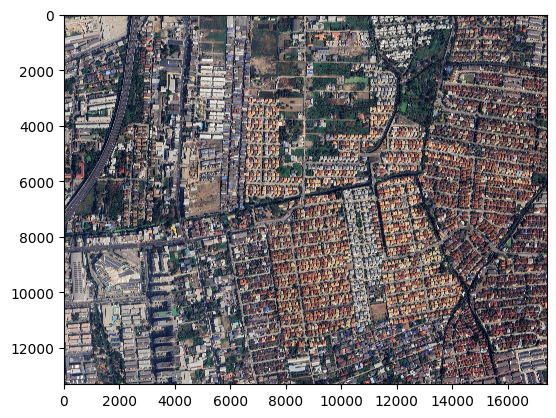

In [21]:
img=mpimg.imread('../data/satellites/watcharapol1.tif')
imgplot = plt.imshow(img)

In [24]:
img.shape

(13312, 17408, 3)

In [1]:
import rioxarray

xds = rioxarray.open_rasterio("../data/satellites/watcharapol1.tif")
_, ysize, xsize = xds.shape

In [2]:
import toml
toml.load('../config.toml')['readtif']

{'name_format': 'filename_xmin_xmax_ymin_ymax',
 'name_mode': 'gps',
 'output_path': 'tiles',
 'stop_if_not_divisible': False,
 'tile_size': 2000,
 'step_size': 0.5}

In [11]:
float(xds.x[10].values)

11203549.747100001

In [56]:
NAME_FORMAT = "filename_xmin_xmax_ymin_ymax"
NAME_FORMAT = NAME_FORMAT.split("_")

In [88]:
TILE_SIZE = 2000
STEP_SIZE = 0.5
_MOVING_SIZE = TILE_SIZE * STEP_SIZE
if(_MOVING_SIZE.is_integer() == False):
    raise ValueError(f"expect `TILE_SIZE * STEP_SIZE`=`{TILE_SIZE}*{STEP_SIZE}` to be integer but got {_MOVING_SIZE}")

In [79]:
from itertools import product
TILE_SIZE = 2000
format_dict = {
    "filename":"asdasd",
    "xmin": None,
    "xmax": None,
    "ymin": None,
    "ymax": None
}

_MOVING_SIZE = TILE_SIZE * STEP_SIZE

for ypt, xpt in product(range(0,ysize,TILE_SIZE), range(0,xsize,TILE_SIZE)):
    ymin, ymax = ypt, ypt + TILE_SIZE
    xmin, xmax = xpt, xpt + TILE_SIZE
    if(ymax > ysize):
        ymax = ysize
    if(xmax > xsize):
        xmax = xsize
    format_dict["xmin"] = xmin
    format_dict["xmax"] = xmax
    format_dict["ymin"] = ymin
    format_dict["ymax"] = ymax
    name = ""
    for fmt in NAME_FORMAT:
        name = f"{name}_{format_dict[fmt]}"
    name = name.lstrip("_")
    print(name)
    temp = xds[:,ymin:ymax,xmin:xmax]
    print(temp.shape)
    temp.rio.to_raster(f"ei/{name}.tif")

asdasd_0_2000_0_2000
(3, 2000, 2000)
asdasd_2000_4000_0_2000
(3, 2000, 2000)
asdasd_4000_6000_0_2000
(3, 2000, 2000)
asdasd_6000_8000_0_2000
(3, 2000, 2000)
asdasd_8000_10000_0_2000
(3, 2000, 2000)
asdasd_10000_12000_0_2000
(3, 2000, 2000)
asdasd_12000_14000_0_2000
(3, 2000, 2000)
asdasd_14000_16000_0_2000
(3, 2000, 2000)
asdasd_16000_17408_0_2000
(3, 2000, 1408)
asdasd_0_2000_2000_4000
(3, 2000, 2000)
asdasd_2000_4000_2000_4000
(3, 2000, 2000)
asdasd_4000_6000_2000_4000
(3, 2000, 2000)
asdasd_6000_8000_2000_4000
(3, 2000, 2000)
asdasd_8000_10000_2000_4000
(3, 2000, 2000)
asdasd_10000_12000_2000_4000
(3, 2000, 2000)
asdasd_12000_14000_2000_4000
(3, 2000, 2000)
asdasd_14000_16000_2000_4000
(3, 2000, 2000)
asdasd_16000_17408_2000_4000
(3, 2000, 1408)
asdasd_0_2000_4000_6000
(3, 2000, 2000)
asdasd_2000_4000_4000_6000
(3, 2000, 2000)
asdasd_4000_6000_4000_6000
(3, 2000, 2000)
asdasd_6000_8000_4000_6000
(3, 2000, 2000)
asdasd_8000_10000_4000_6000
(3, 2000, 2000)
asdasd_10000_12000_4000_6000

In [62]:
name = "_asd_ijfgdf"
x = name.lstrip("_")

In [63]:
name

'_asd_ijfgdf'

In [44]:
xds.shape

(3, 13312, 17408)

In [48]:
import rioxarray

temp = rioxarray.open_rasterio("./asdasd_12000_13312.tif")
temp

<xarray.DataArray (band: 3, y: 1312, x: 2000)> Size: 8MB
[7872000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 16kB 1.12e+07 1.12e+07 ... 1.12e+07 1.12e+07
  * y            (y) float64 10kB 1.558e+06 1.558e+06 ... 1.558e+06 1.558e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0